In [1]:
from models.candlestick import Candlestick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

candlestick = Candlestick()
df = candlestick.to_df()

# data = logDiff(df['close'])
data = [0]

for index, row in df.iterrows():
    if index < 1 or index > df['close'].count() - 1:
        continue
    data.append(100*(df.iloc[index - 1]['low'] - row['close'])/df.iloc[index - 1]['low'])


df['day_change'] = data

print(df)

           date      open      high     close       low              volumn  \
0    2017-08-17   4261.48   4485.39   4285.08   4200.74 2021-07-08 16:30:14   
1    2017-08-18   4285.08   4371.52   4108.37   3938.77 2021-07-08 16:30:14   
2    2017-08-19   4108.37   4184.69   4139.98   3850.00 2021-07-08 16:30:14   
3    2017-08-20   4120.98   4211.08   4086.29   4032.62 2021-07-08 16:30:14   
4    2017-08-21   4069.13   4119.62   4016.00   3911.79 2021-07-08 16:30:14   
...         ...       ...       ...       ...       ...                 ...   
1417 2021-07-04  34669.10  35967.90  35286.50  34357.10 2021-07-08 16:30:21   
1418 2021-07-05  35288.10  35293.80  33690.10  33125.60 2021-07-08 16:30:21   
1419 2021-07-06  33690.10  35118.90  34220.00  33532.00 2021-07-08 16:30:21   
1420 2021-07-07  34220.00  35059.10  33862.10  33777.80 2021-07-08 16:30:21   
1421 2021-07-08  33862.10  33929.60  32834.20  32077.00 2021-07-08 16:30:21   

     atr14  day_change  
0     None    0.000000  
1

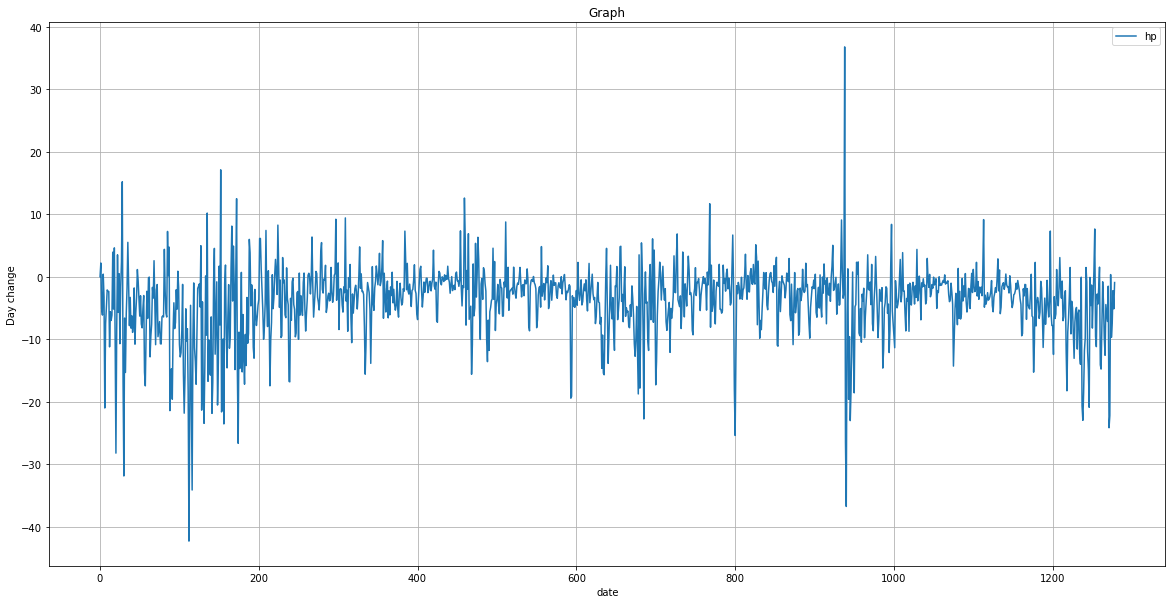

In [2]:



plt.figure(figsize=(20,10))

plt.plot(df['day_change'], label='hp')

plt.xlabel('date')
plt.ylabel('Day change')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()


<AxesSubplot:>

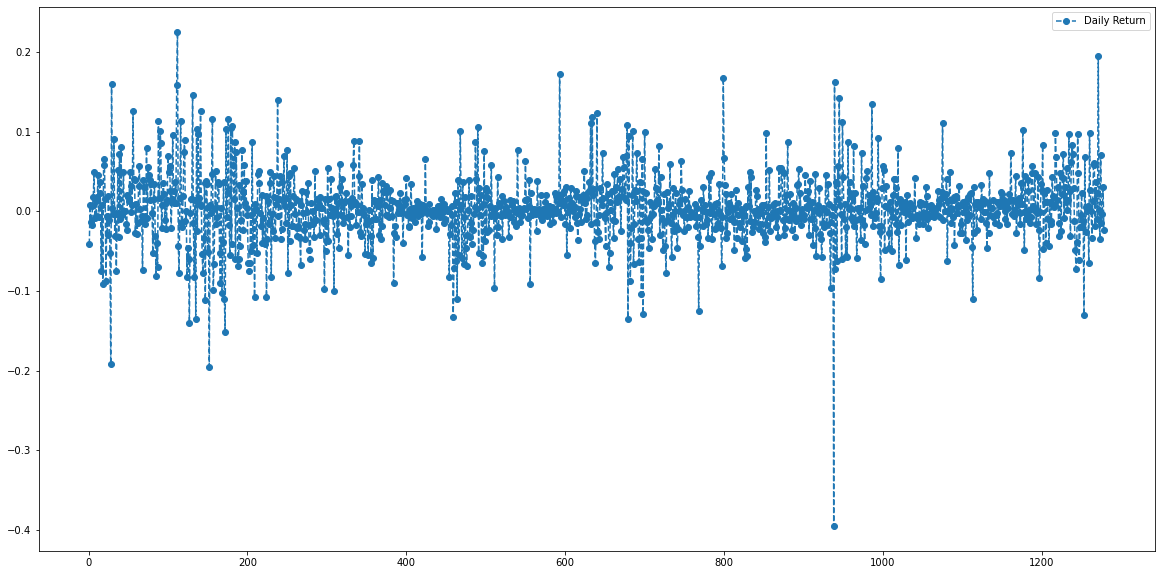

In [4]:
# The Daily Return Per
df['Daily Return'] = df['close'].pct_change()

df['Daily Return'].plot(figsize=[20,10], legend=True, linestyle='--', marker='o')


<AxesSubplot:>

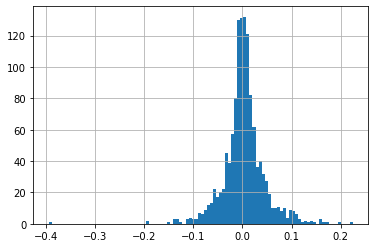

In [5]:
# Histogram

df['Daily Return'].hist(bins=100)

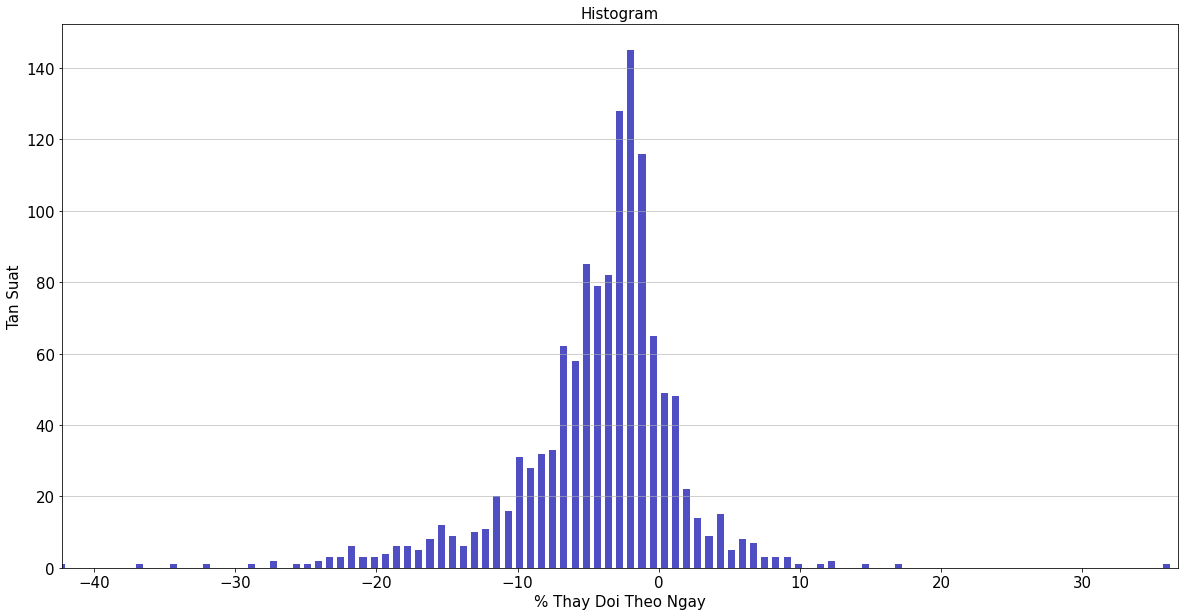

In [9]:
data = np.array(df['day_change'].tolist())
data = data[~np.isnan(data)]

hist,bin_edges = np.histogram(data, bins=100)

# print(f"{hist},{bin_edges}")

plt.figure(figsize=[20,10])

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% Thay Doi Theo Ngay',fontsize=15)
plt.ylabel('Tan Suat',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram',fontsize=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

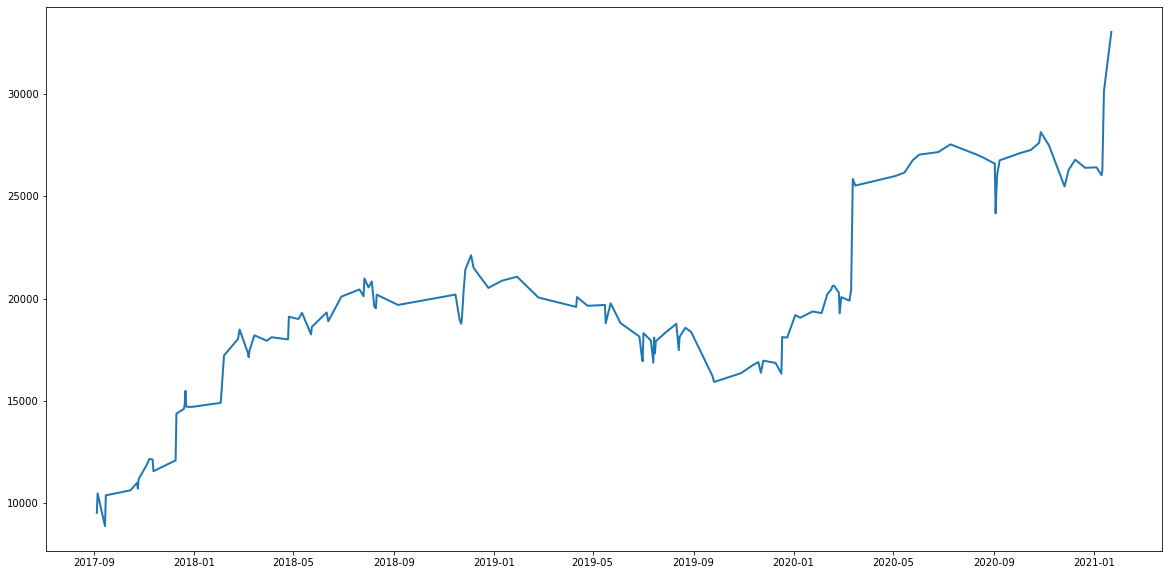

In [6]:
fund = 10000

x_column = []
y_column = []

count = 0

for index, row in df.iterrows():
    if index < 14 or index > df['close'].count() - 2:
        continue
    if ((float(row['atr14']) > float(df.iloc[index - 1]['atr14'])) and (float(row['low']) > float(df.iloc[index + 1]['low']))):
        count = count + 1
        fund = fund*float(df.iloc[index + 1]['close'])/float(row['low'])
        x_column.append(fund)
        y_column.append(df.iloc[index + 1]['date'])

plt.figure(figsize=(20,10))
plt.plot(y_column,x_column,linewidth=2, markersize=121)
plt.show

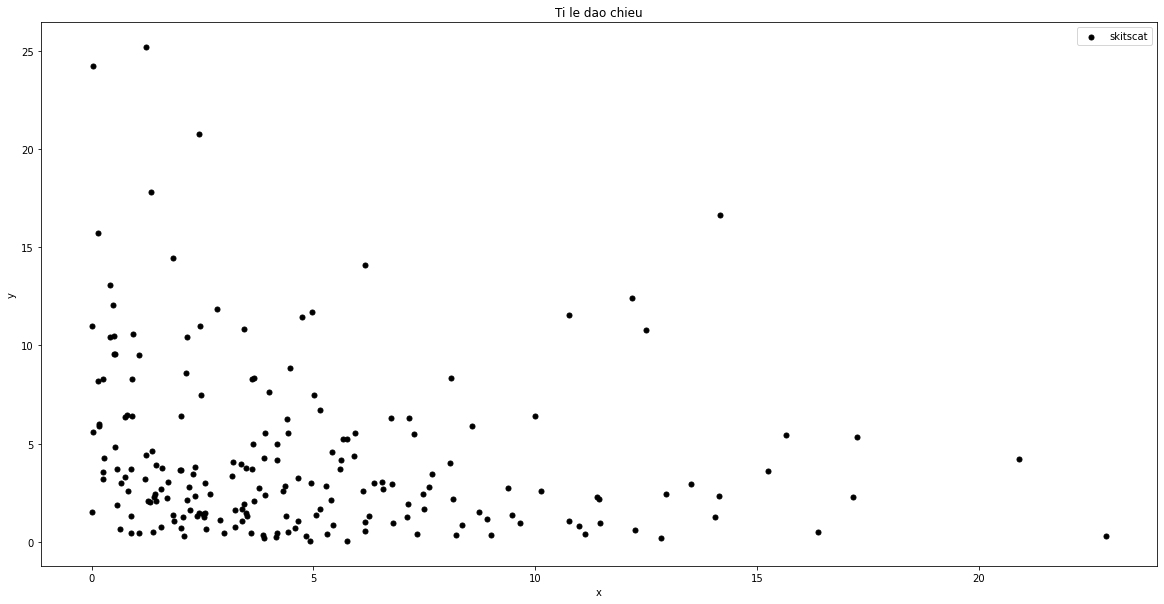

In [16]:
x_asiex = []
y_asiex = []


for index, row in df.iterrows():
    if index < 1 or index > df['close'].count() - 2:
        continue

    ath_high = 100*(abs(df.iloc[index - 1]['close'] - row['high'])/df.iloc[index - 1]['close'])
    ath_low = 100*(abs(df.iloc[index - 1]['close'] - row['high'])/df.iloc[index - 1]['close'])

    if ath_high >= ath_low:
        x_asiex.append(ath_high)
        diff = abs(row['high'] - row['close'])
        y_asiex.append(diff/row['close']*100)
    else:
        x_asiex.append(ath_low)
        diff = abs(row['low'] - row['close'])
        y_asiex.append(diff/row['close']*100)

plt.figure(figsize=(20,10))
plt.scatter(x_asiex[:200],y_asiex[:200], label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ti le dao chieu')
plt.legend()
plt.show()